In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_data.csv to heart_disease_data (1).csv


In [43]:
df = pd.read_csv('heart_disease_data.csv')  # change 'heart.csv' if the uploaded name is different
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [53]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_lr = model.predict(X_test)

# Evaluate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of the Logistic Regression model:", accuracy_lr)


Accuracy of the Logistic Regression model: 0.8688524590163934


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


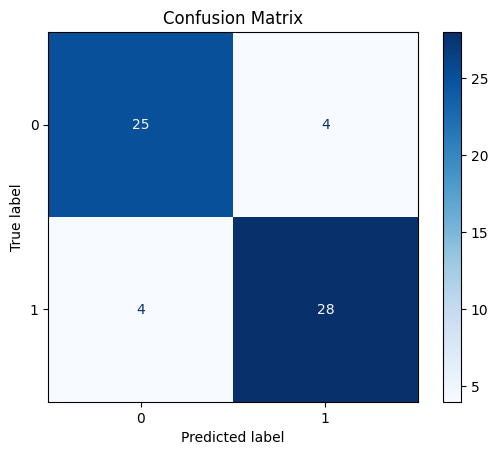

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [48]:
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest model:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Accuracy of Random Forest model: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [50]:
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict
svm_pred = svm_model.predict(X_test)

# Evaluate
print("Accuracy of SVM model:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

# Store the accuracy
accuracy_svm = accuracy_score(y_test, svm_pred)


Accuracy of SVM model: 0.7049180327868853

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



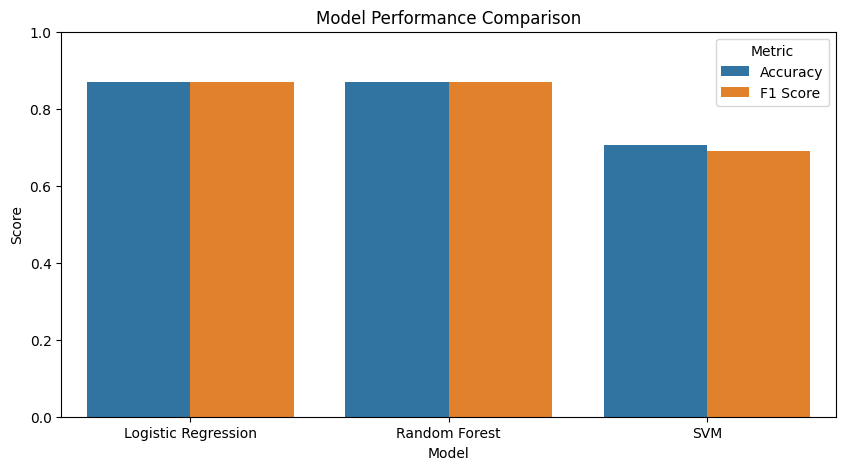

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance data
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm]
f1_scores = [0.87, 0.87, 0.69]  # Taken from weighted avg f1-score of classification reports

# Create a DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.show()


In [54]:
import joblib

# Save all three models
joblib.dump(model, 'heart_disease_data.csv_logistic_regression.pkl')
joblib.dump(rf_model, 'heart_disease_data.csv_random_forest.pkl')
joblib.dump(svm_model, 'heart_disease_data.csv_svm.pkl')

# Save the scaler and feature names
joblib.dump(scaler, 'heart_disease_data_scaler.pkl')
joblib.dump(X.columns.tolist(), 'heart_disease_data_feature_names.pkl')

print("All models, scaler, and feature names saved successfully!")



All models, scaler, and feature names saved successfully!


In [57]:
import joblib
import numpy as np
import pandas as pd

# Load the model, scaler, and feature names
model = joblib.load('heart_disease_data.csv_logistic_regression.pkl')
scaler = joblib.load('heart_disease_data_scaler.pkl')
feature_names = joblib.load('heart_disease_data_feature_names.pkl')

# Sample input data
input_data = [57, 1, 2, 130, 236, 0, 0, 174, 0, 0.0, 1, 1, 2]

# Convert input to DataFrame
input_df = pd.DataFrame([input_data], columns=feature_names)

# Scale the input
input_scaled = pd.DataFrame(scaler.transform(input_df), columns=feature_names)

# Make prediction
prediction = model.predict(input_scaled)

# Output result
if prediction[0] == 0:
    print("The person is **not likely** to have heart disease.")
else:
    print("The person is **likely** to have heart disease.")


The person is **likely** to have heart disease.
